In [113]:
import numpy as np
from scipy.sparse import csr_matrix, lil_matrix
import networkx as nx
import matplotlib.pyplot as plt


In [114]:
import numpy as np
from scipy.sparse import csr_matrix

class DSB_GraphColoring:
    def __init__(self, adjacency_matrix, num_colors, n_iter=10000, dt=1, xi=None):
        """Discrete Simulated Bifurcation (DSB) for Graph Coloring"""
        self.N = adjacency_matrix.shape[0]  # Number of nodes
        self.C = num_colors  # Number of colors
        
        # Expand the adjacency matrix for color constraints
        J = np.zeros((self.N * self.C, self.N * self.C))

        A = 10  # Large penalty for one-hot constraint
        B = 1   # Penalty for adjacent nodes having the same color

        # Construct QUBO matrix
        for i in range(self.N):
            for c in range(self.C):
                J[i*self.C + c, i*self.C + c] = -A  # Enforce one color per node

        for i in range(self.N):
            for j in range(self.N):
                if adjacency_matrix[i, j] == 1:  # Edge exists
                    for c in range(self.C):
                        J[i*self.C + c, j*self.C + c] = B  # Adjacent nodes different colors

        self.J = csr_matrix(J)

        # Initialize variables
        self.n_iter = n_iter
        self.dt = dt
        self.xi = xi if xi else 0.5 * np.sqrt(self.N - 1) / np.sqrt(csr_matrix.power(self.J, 2).sum())

        self.initialize()

    def initialize(self):
        """Initialize spin variables"""
        self.x = 0.02 * (np.random.rand(self.N * self.C, 1) - 0.5)
        self.y = 0.02 * (np.random.rand(self.N * self.C, 1) - 0.5)

    def update(self):
        """Simulated bifurcation evolution"""
        for i in range(self.n_iter):
            self.y += (-self.x + self.xi * self.J.dot(np.sign(self.x))) * self.dt
            self.x += self.dt * self.y

            cond = np.abs(self.x) > 1
            self.x = np.where(cond, np.sign(self.x), self.x)
            self.y = np.where(cond, np.zeros_like(self.y), self.y)

    def get_solution(self):
        """Extract coloring solution"""
        x_discrete = np.sign(self.x).reshape(self.N, self.C)
        coloring = np.argmax(x_discrete, axis=1)
        return coloring


# Example adjacency matrix (Graph with 4 nodes)
adjacency_matrix = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

adjacency_matrix = np.array([
        [0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
    ])

num_colors = 3  # Attempting to color using 3 colors
dsb_solver = DSB_GraphColoring(adjacency_matrix, num_colors)
dsb_solver.update()
solution = dsb_solver.get_solution()

print("Graph Coloring Solution:", solution)


Graph Coloring Solution: [0 0 0 1 1 0 0 1 0 1]


In [115]:
# Function to visualize the graph coloring
def visualize_graph_coloring(adjacency_matrix, coloring):
    """
    Visualize the graph with the assigned colors.
    
    Args:
        adjacency_matrix (numpy.array): The adjacency matrix of the graph.
        coloring (list): The color assigned to each node.
    """
    # Create a graph from the adjacency matrix
    G = nx.from_numpy_array(adjacency_matrix)
    
    # Set up the color map
    color_list = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink']
    node_colors = [color_list[c % len(color_list)] for c in coloring]
    
    # Draw the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  # For consistent layout
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_weight='bold')
    plt.title("Graph Coloring Result")
    plt.show()

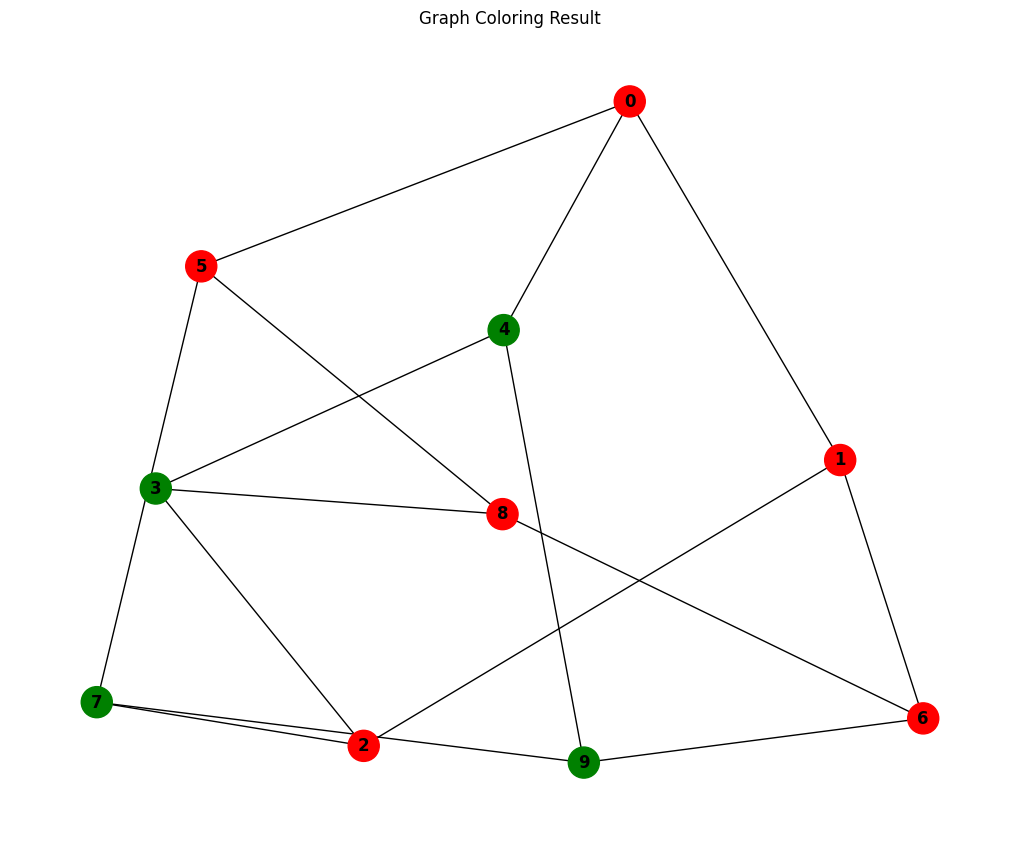

In [ ]:
visualize_graph_coloring(adjacency_matrix, solution)